In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob

In [3]:
df = pd.DataFrame()

for q_csv in glob.glob('../data/csv/q*'):
    q_data = pd.read_csv(q_csv)
    df = pd.concat([df, q_data])

data = df.iloc[:,1:]
data = data.dropna()
data

,sensorId,latitude,longitude,elevation,fromDateTime,tillDateTime,PM1,PM25,PM10,pressure,humidity,temperature,wind_speed,wind_bearing
24,10039,50.067312,19.903360,203.88,2022-03-11 15:00:00+00:00,2022-03-11 16:00:00+00:00,2.33,3.35,4.63,1032.74,29.06,0.42,19.70,95.65
25,10039,50.067312,19.903360,203.88,2022-03-11 16:00:00+00:00,2022-03-11 17:00:00+00:00,3.95,5.85,8.05,1032.75,34.41,-0.53,18.53,92.94
26,10039,50.067312,19.903360,203.88,2022-03-11 17:00:00+00:00,2022-03-11 18:00:00+00:00,5.18,7.44,10.29,1033.03,44.89,-2.14,16.34,89.04
27,10039,50.067312,19.903360,203.88,2022-03-11 18:00:00+00:00,2022-03-11 19:00:00+00:00,7.83,11.63,16.38,1033.04,52.23,-3.17,14.98,96.00
28,10039,50.067312,19.903360,203.88,2022-03-11 19:00:00+00:00,2022-03-11 20:00:00+00:00,8.65,13.02,18.81,1033.17,55.11,-3.89,13.49,96.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429395,7917,49.990900,20.032260,243.62,2022-06-30 23:00:00+00:00,2022-07-01 00:00:00+00:00,12.28,17.89,24.86,1010.43,53.82,21.15,3.13,139.61
429398,9077,50.128409,19.973662,297.50,2022-06-30 22:00:00+00:00,2022-06-30 23:00:00+00:00,11.16,15.37,21.68,1011.98,76.75,22.85,5.00,99.00
429399,9077,50.128409,19.973662,297.50,2022-06-30 23:00:00+00:00,2022-07-01 00:00:00+00:00,11.22,15.31,21.68,1012.10,79.00,22.09,4.25,124.00
429400,318,50.194065,19.900494,375.50,2022-06-30 22:00:00+00:00,2022-06-30 23:00:00+00:00,11.25,14.65,21.04,1012.71,52.08,22.27,8.24,90.83


In [41]:
data['month'] = data['fromDateTime'].map(lambda x:datetime.fromisoformat(x).month)
data['day'] = data['fromDateTime'].map(lambda x:datetime.fromisoformat(x).weekday())
data['hour'] = data['fromDateTime'].map(lambda x:datetime.fromisoformat(x).hour)
data.drop(['fromDateTime', 'tillDateTime'], axis=1, inplace=True)
data

,sensorId,latitude,longitude,elevation,PM1,PM25,PM10,pressure,humidity,temperature,wind_speed,wind_bearing,month,day,hour
24,10039,50.067312,19.903360,203.88,2.33,3.35,4.63,1032.74,29.06,0.42,19.70,95.65,3,4,15
25,10039,50.067312,19.903360,203.88,3.95,5.85,8.05,1032.75,34.41,-0.53,18.53,92.94,3,4,16
26,10039,50.067312,19.903360,203.88,5.18,7.44,10.29,1033.03,44.89,-2.14,16.34,89.04,3,4,17
27,10039,50.067312,19.903360,203.88,7.83,11.63,16.38,1033.04,52.23,-3.17,14.98,96.00,3,4,18
28,10039,50.067312,19.903360,203.88,8.65,13.02,18.81,1033.17,55.11,-3.89,13.49,96.63,3,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246715,86980,50.043741,19.966589,201.63,9.42,12.87,16.22,1019.97,57.02,17.40,2.85,325.22,5,5,17
246716,86980,50.043741,19.966589,201.63,11.19,15.67,19.89,1020.14,60.91,16.04,5.30,209.57,5,5,18
246717,86980,50.043741,19.966589,201.63,13.09,18.62,24.94,1020.25,66.66,15.13,5.36,167.00,5,5,19
246718,86980,50.043741,19.966589,201.63,14.40,20.66,29.07,1020.33,68.15,14.74,4.53,174.83,5,5,20


<AxesSubplot:>

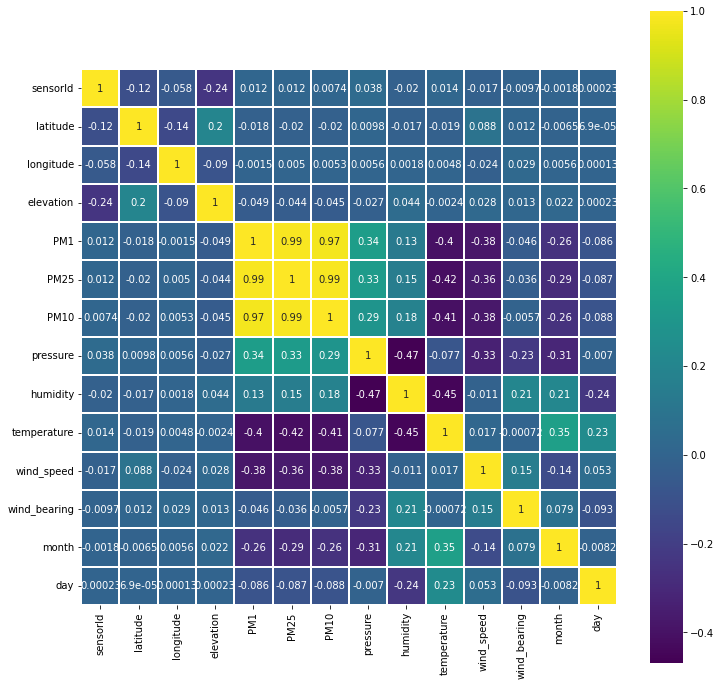

In [16]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

In [17]:
data_n = (data-data.mean())/data.std()
data_n

,sensorId,latitude,longitude,elevation,PM1,PM25,PM10,pressure,humidity,temperature,wind_speed,wind_bearing,month,day
24,-0.787557,-0.107544,-0.379089,-0.998075,-1.476044,-1.402312,-1.366048,1.371971,-2.033493,-1.209745,1.273551,-0.727250,-1.327255,0.505634
25,-0.787557,-0.107544,-0.379089,-0.998075,-1.257714,-1.198434,-1.164450,1.372854,-1.754925,-1.375531,1.097050,-0.751682,-1.327255,0.650070
26,-0.787557,-0.107544,-0.379089,-0.998075,-1.091946,-1.068768,-1.032409,1.397586,-1.209245,-1.656495,0.766677,-0.786843,-1.327255,0.794506
27,-0.787557,-0.107544,-0.379089,-0.998075,-0.734802,-0.727070,-0.673423,1.398469,-0.827061,-1.836242,0.561514,-0.724095,-1.327255,0.938943
28,-0.787557,-0.107544,-0.379089,-0.998075,-0.624290,-0.613714,-0.530182,1.409952,-0.677104,-1.961891,0.336740,-0.718415,-1.327255,1.083379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246715,1.473190,-0.466788,0.373504,-1.042100,-0.520516,-0.625946,-0.682854,0.244008,-0.577652,1.753464,-1.268360,1.342465,1.851296,0.794506
246716,1.473190,-0.466788,0.373504,-1.042100,-0.281971,-0.397604,-0.466519,0.259024,-0.375105,1.516128,-0.898765,0.299809,1.851296,0.938943
246717,1.473190,-0.466788,0.373504,-1.042100,-0.025906,-0.157028,-0.168838,0.268740,-0.075710,1.357322,-0.889713,-0.083986,1.851296,1.083379
246718,1.473190,-0.466788,0.373504,-1.042100,0.150644,0.009336,0.074612,0.275806,0.001872,1.289262,-1.014923,-0.013393,1.851296,1.227815


In [18]:
array = data_n.values
pca = PCA()
X_pca = pca.fit_transform(array)
X_pca/=10

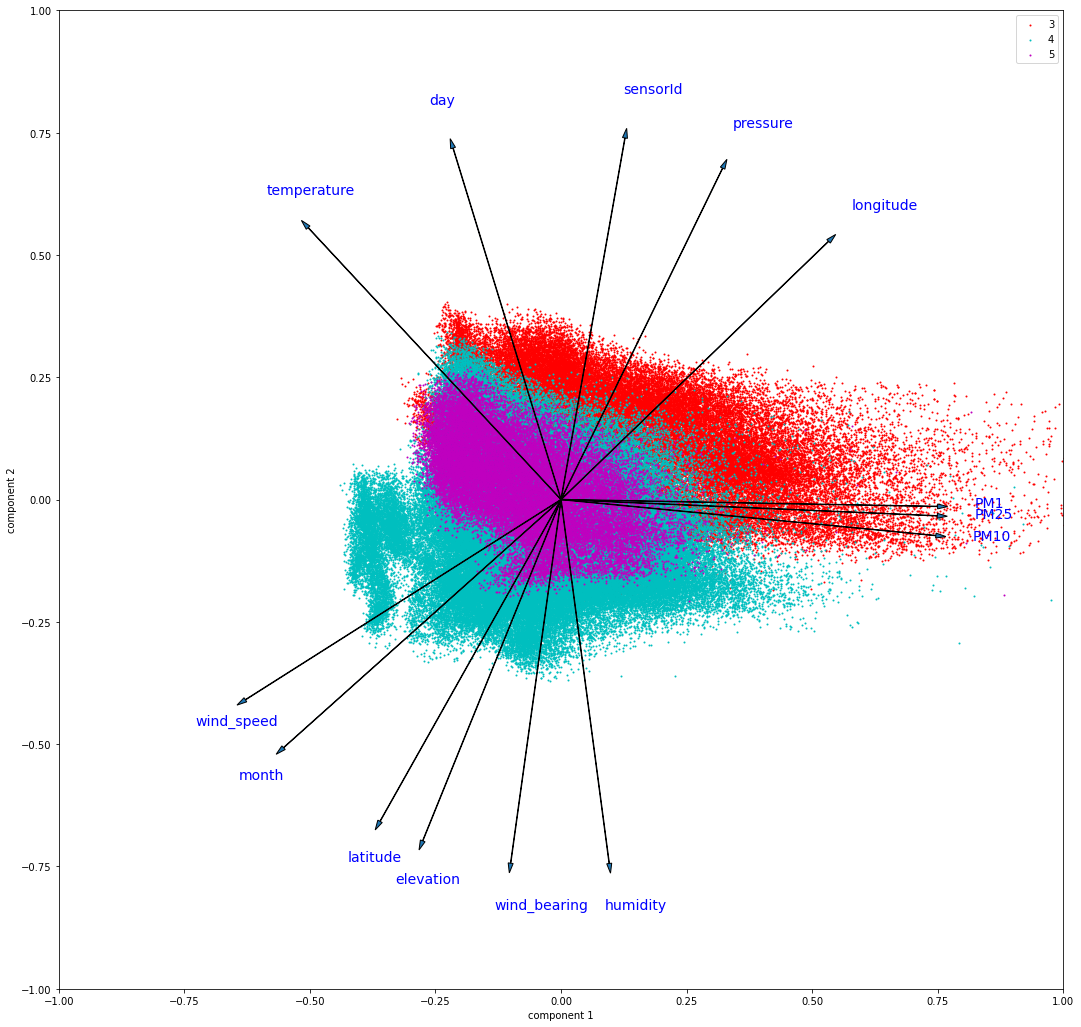

In [38]:
points = pd.DataFrame(data['month'])
points['x'] = X_pca[:, 0]
points['y'] = X_pca[:, 1]

comps0 = pca.components_[0]
comps1 = pca.components_[1]

colormap = ['b','g','r','c','m','y','k','w']

plt.figure(figsize=(18, 18))
for m in data['month'].unique():
    m_points = points[ points['month'] == m]
    plt.scatter(m_points['x'], m_points['y'], c=colormap[m-1 % len(colormap)], label=m, s=1)

plt.xlabel("component 1")
plt.ylabel("component 2")
plt.legend()
plt.xlim([-1, 1])
plt.ylim([-1, 1])
comps_zipped = zip(pca.components_[0], pca.components_[1], data.columns.values)

for i, comps in enumerate(comps_zipped):
    x, y, trait = comps
    length = np.sqrt(x**2 + y**2)
    x *= 3/(4*length)
    y *= 3/(4*length)
    plt.arrow(0, 0, x, y, head_width=0.01, head_length=0.02)
    x *= 9/8
    x -= 0.02
    y *= 9/8
    plt.text(x, y, trait, fontsize=14, c='blue')

plt.show()